In [1]:
# D8 drainage area raster
# Raster calculator : keep only > accum area threshold
# Turn into polylines
# QChainage plugin in QGIS for evenly spaced points along polylines
# sample area, elevation rasters to points
# add x, y coordinates

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"] = "Arial"
import matplotlib.ticker
import matplotlib.cm as cm
import matplotlib.colors as colors


In [59]:
dry = pd.read_csv('data\\Dry_Densified_Nodes_Dec9.csv')
fox = pd.read_csv('data\\Fox.csv')
elder = pd.read_csv('data\\Elder_Nodes_12-12_Legit.csv')
hank = pd.read_csv('data\\Hank_Nodes_Best_Dec_7.csv')

elder.head()


,FID,POINTID,GRID_CODE,angelo1m20,ANGELO_FLO,X_UTM,Y_UTM
0,0,121701,1874,990.833984,6243.0,447677.0,4398437.0
1,1,121772,1874,990.671997,6245.0,447677.0,4398436.0
2,2,121834,1874,990.474976,6805.0,447676.0,4398435.0
3,3,121889,1874,990.262024,6852.0,447676.0,4398434.0
4,4,121958,1874,989.999023,6939.0,447676.0,4398433.0


In [4]:
flowSources = pd.read_csv('data\\flowheads_12_8_1.csv')
flowSources.head()


,Data Point_ACRR,Accumulation Area (m^2)_ACRR,Slope (degrees)_ACRR,Slope (%)_ACRR,Type_ACRR,Data Point_SR,Flow accumulation area (m^2)_SR,Slope (%)_SR,Type_SR
0,1,2722730,1.902546,3.319350,In channel,1.0,73.0,116.565002,In channel Flowhead
1,2,2642120,5.924642,10.303831,In channel,2.0,5.0,65.481598,Flowhead
2,3,32438,29.145733,47.057462,Flowhead,3.0,127.0,78.740501,Flowhead
3,4,9515,9.291775,16.077239,Flowhead,4.0,1200770.0,2.048360,In channel
4,5,9088,16.782904,28.494596,Flowhead,5.0,278.0,22.172100,Piped Flowhead


In [5]:
# elder['GRID_CODE'] = np.where((elder['ANGELO_FLO'] > 5171000),
#                           9999999999,
#                           elder['GRID_CODE'])

# elder = elder[elder['GRID_CODE']==9999999999]
# elder['RevArea'] = elder.ANGELO_FLO*-1

# hank['fid_1'] = np.where((hank['flow_accum'] > 1150000),
#                           9999999999,
#                           hank['fid_1'])

In [60]:
segmentsDry = set(dry['streamorde'])
segmentsFox = set(fox['IX'])
segmentsElder = set(elder['GRID_CODE'])
segmentsHank = set(hank['fid_1'])


In [61]:
# dry = dry.sample(frac=0.5)
# fox = fox.sample(frac=0.5)
# elder = elder.sample(frac=0.5)
#hank = hank.sample(frac=0.1)


dry = dry.sort_values(['streamorde', 'AngeloSage'])
fox = fox.sort_values(['IX', 'AngeloSage'])
hank = hank.sort_values(['fid_1', 'Ground'])
elder = elder.sort_values(['GRID_CODE', 'FID'])
#elder = elder.sort_values(['fid_1', 'FID'])

In [8]:
def dist(x1, y1, x2, y2):
    distance = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [9]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

In [62]:
slopesDry = []
areasDry = []
elevsDry = []
XsDry = []
YsDry = []

slopesFox = []
areasFox = []
elevsFox = []
XsFox = []
YsFox = []

slopesElder = []
areasElder = []
elevsElder = []
XsElder = []
YsElder = []

slopesHank = []
areasHank = []
elevsHank = []
XsHank = []
YsHank = []

In [11]:
contourThreshold = 3


In [12]:
###DRY

for segment in segmentsDry:
    df = dry[dry['streamorde'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasDry.append(df.iloc[i]['flowacc_co'])
                    elevsDry.append(df.iloc[i]['AngeloSage'])
                    XsDry.append(df.iloc[i]['X_UTM'])
                    YsDry.append(df.iloc[i]['Y_UTM'])
                    slopesDry.append((dif/distance)*100)
                    break

                    
                    

In [13]:
###FOX

for segment in segmentsFox:
    df = fox[fox['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasFox.append(df.iloc[i]['flowacc_co'])
                    elevsFox.append(df.iloc[i]['AngeloSage'])
                    XsFox.append(df.iloc[i]['X_UTM'])
                    YsFox.append(df.iloc[i]['Y_UTM'])
                    slopesFox.append((dif/distance)*100)
                    break


In [63]:
###ELDER

for segment in segmentsElder:
    df = elder[elder['GRID_CODE'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X_UTM'],
                                           df.iloc[j]['Y_UTM'],
                                           df.iloc[j+1]['X_UTM'],
                                           df.iloc[j+1]['Y_UTM'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['angelo1m20'] - df.iloc[i]['angelo1m20']) 
                if dif > contourThreshold:
                    areasElder.append(df.iloc[i]['ANGELO_FLO'])
                    elevsElder.append(df.iloc[i]['angelo1m20'])
                    XsElder.append(df.iloc[i]['X_UTM'])
                    YsElder.append(df.iloc[i]['Y_UTM'])
                    slopesElder.append((dif/distance)*100)
                    break


In [64]:
###HANK

for segment in segmentsHank:
    df = hank[hank['fid_1'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X_UTM'],
                                           df.iloc[j]['Y_UTM'],
                                           df.iloc[j+1]['X_UTM'],
                                           df.iloc[j+1]['Y_UTM'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['Ground'] - df.iloc[i]['Ground']) 
                if dif > contourThreshold:
                    areasHank.append(df.iloc[i]['flow_accum'])
                    elevsHank.append(df.iloc[i]['Ground'])
                    XsHank.append(df.iloc[i]['X_UTM'])
                    YsHank.append(df.iloc[i]['Y_UTM'])
                    slopesHank.append((dif/distance)*100)
                    break


In [48]:
flowSources.head()

,Data Point_ACRR,Accumulation Area (m^2)_ACRR,Slope (degrees)_ACRR,Slope (%)_ACRR,Type_ACRR,Data Point_SR,Flow accumulation area (m^2)_SR,Slope (%)_SR,Type_SR
0,1,2722730,1.902546,3.319350,In channel,1.0,73.0,116.565002,In channel Flowhead
1,2,2642120,5.924642,10.303831,In channel,2.0,5.0,65.481598,Flowhead
2,3,32438,29.145733,47.057462,Flowhead,3.0,127.0,78.740501,Flowhead
3,4,9515,9.291775,16.077239,Flowhead,4.0,1200770.0,2.048360,In channel
4,5,9088,16.782904,28.494596,Flowhead,5.0,278.0,22.172100,Piped Flowhead


In [65]:
#GENERATE LOGARITHMIC BIN SPACING
numBins = 21

elderArea = np.asarray(areasElder)[np.asarray(areasElder)>6180]
foxArea =np.asarray(areasFox)[np.asarray(areasFox)>6180]
dryArea = np.asarray(areasDry)[np.asarray(areasDry)> 1085]
hankArea = np.asarray(areasHank)[np.asarray(areasHank)> 1085]

elderSlope = np.asarray(slopesElder)[np.asarray(areasElder)>6180]
foxSlope = np.asarray(slopesFox)[np.asarray(areasFox)>6180]
drySlope = np.asarray(slopesDry)[np.asarray(areasDry)>1085]
hankSlope = np.asarray(slopesHank)[np.asarray(areasHank)>1085]

area_bins_elder = np.logspace(np.log10(min(elderArea)), np.log10(max(elderArea)), numBins)
area_bins_fox = np.logspace(np.log10(min(foxArea)), np.log10(max(foxArea)), numBins)
area_bins_hank = np.logspace(np.log10(min(hankArea)), np.log10(max(hankArea)), numBins)
area_bins_dry = np.logspace(np.log10(min(dryArea)), np.log10(max(dryArea)), numBins)


#Return the indices_elder of the bins to which each value in input array belongs.
indices_elder = np.digitize(elderArea, area_bins_elder)
indices_fox = np.digitize(foxArea, area_bins_fox)
indices_hank = np.digitize(hankArea, area_bins_hank)
indices_dry = np.digitize(dryArea, area_bins_dry)

#COMPUTE MEAN, MEDIAN AND STANDARD DEVIATION OF SLOPE IN EACH AREA BIN
bin_means_elder = [elderSlope[indices_elder == i].mean() for i in range(1, len(area_bins_elder))]
bin_medians_elder = [np.median(elderSlope[indices_elder == i]) for i in range(1, len(area_bins_elder))]
bin_stds_elder = [elderSlope[indices_elder == i].std() for i in range(1, len(area_bins_elder))]

bin_means_fox = [foxSlope[indices_fox == i].mean() for i in range(1, len(area_bins_fox))]
bin_medians_fox = [np.median(foxSlope[indices_fox == i]) for i in range(1, len(area_bins_fox))]
bin_stds_fox = [foxSlope[indices_fox == i].std() for i in range(1, len(area_bins_fox))]

bin_means_hank = [hankSlope[indices_hank == i].mean() for i in range(1, len(area_bins_hank))]
bin_medians_hank = [np.median(hankSlope[indices_hank == i]) for i in range(1, len(area_bins_hank))]
bin_stds_hank = [hankSlope[indices_hank == i].std() for i in range(1, len(area_bins_hank))]

bin_means_dry = [drySlope[indices_dry == i].mean() for i in range(1, len(area_bins_dry))]
bin_medians_dry = [np.median(drySlope[indices_dry == i]) for i in range(1, len(area_bins_dry))]
bin_stds_dry = [drySlope[indices_dry == i].std() for i in range(1, len(area_bins_dry))]



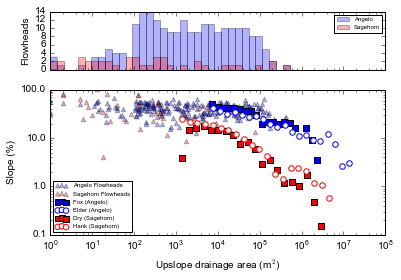

In [69]:
flowSources['Type_SR'].fillna('x', inplace=True)

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True, gridspec_kw = {'height_ratios':[1, 2.5]})
axarr[0].hist(flowSources['Accumulation Area (m^2)_ACRR'][flowSources['Type_ACRR'].str.contains('Flowhead')], 
              bins = np.logspace(0,8, 50), color='blue', alpha=0.3, label='Angelo')
axarr[0].hist(flowSources['Flow accumulation area (m^2)_SR'][flowSources['Type_SR'].str.contains('Flowhead')], 
              bins = np.logspace(0,8, 50), color='red', alpha=0.3, label='Sagehorn')
axarr[0].legend(loc='upper right', prop={'size':6})


axarr[0].set_ylabel('Flowheads')

areasFox = np.asarray(areasFox)
slopesFox = np.asarray(slopesFox)
areasDry = np.asarray(areasDry)
slopesDry = np.asarray(slopesDry)

# axarr[1].scatter(areasFox[areasFox>6180],slopesFox[areasFox>6180],
#             #c = get_colors(elevsFox, plt.cm.jet),
#             color='blue',
#             label='Fox (Angelo)', alpha=0.02, linewidth=0)
# axarr[1].scatter(areasDry[areasDry> 1085],slopesDry[areasDry> 1085],
#             #c = get_colors(elevsDry, plt.cm.jet),
#             color='Red',
#             label='Dry (Sagehorn)', alpha=0.02, linewidth=0)



axarr[1].scatter(flowSources['Accumulation Area (m^2)_ACRR'][flowSources['Type_ACRR'].str.contains('Flowhead')],
                 flowSources['Slope (%)_ACRR'][flowSources['Type_ACRR'].str.contains('Flowhead')],
            #c = get_colors(elevsDry, plt.cm.jet),
            color='Blue',
            marker='^',
            label='Angelo Flowheads', linewidth  =1, edgecolor ='k', zorder=-10, alpha=0.3)

axarr[1].scatter(flowSources['Flow accumulation area (m^2)_SR'][flowSources['Type_SR'].str.contains('Flowhead')],
                 flowSources['Slope (%)_SR'][flowSources['Type_SR'].str.contains('Flowhead')],
            #c = get_colors(elevsDry, plt.cm.jet),
            color='Red',
            marker='^',
            label='Sagehorn Flowheads',linewidth  =1, edgecolor ='k', zorder=-5,alpha=0.3)

plotError=False

symbolSize = 30
axarr[1].scatter(.5*(area_bins_fox[1:]+area_bins_fox[:-1]),bin_medians_fox, s=symbolSize, marker = "s", color = 'blue',edgecolor='k', label="Fox (Angelo)")
axarr[1].scatter(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_medians_elder, s=symbolSize, marker = "o", color = 'white',edgecolor='blue', label="Elder (Angelo)")
axarr[1].scatter(.5*(area_bins_dry[1:]+area_bins_dry[:-1]),bin_medians_dry, s=symbolSize, marker = "s", color = 'red',edgecolor='k', label="Dry (Sagehorn)")
axarr[1].scatter(.5*(area_bins_hank[1:]+area_bins_hank[:-1]),bin_medians_hank, s=symbolSize, marker = "o", color = 'white', edgecolor='red',label="Hank (Sagehorn)")

if plotError:
    axarr[1].errorbar(.5*(area_bins_elder[1:]+area_bins_elder[:-1]),bin_medians_elder, yerr=bin_stds_elder, fmt = None, capthick=0, ecolor = 'r')
    axarr[1].errorbar(.5*(area_bins_fox[1:]+area_bins_fox[:-1]),bin_medians_fox, yerr=bin_stds_fox, fmt = None, capthick=0, ecolor = 'r')
    axarr[1].errorbar(.5*(area_bins_hank[1:]+area_bins_hank[:-1]),bin_medians_hank, yerr=bin_stds_hank, fmt = None, capthick=0, ecolor = 'b')
    axarr[1].errorbar(.5*(area_bins_dry[1:]+area_bins_dry[:-1]),bin_medians_dry, yerr=bin_stds_dry, fmt = None, capthick=0, ecolor = 'b')


# axarr[1].scatter()
# axarr[1].scatter(areasElder,slopesElder,
#             #c = get_colors(elevsDry, plt.cm.jet),
#             color='Blue',
#             label='Elder', alpha=0.05, linewidth=0)
# axarr[1].scatter(areasHank,slopesHank,
#             #c = get_colors(elevsDry, plt.cm.jet),
#             color='Orange',
#             label='Hank', alpha=0.05, linewidth=0)
plt.legend(loc='lower left',numpoints=1, prop={'size':6})
plt.xlabel(r'Upslope drainage area (m$^2$)')
plt.ylabel('Slope (%)')
plt.xlim([1,10**8])
plt.ylim([0.1,100])
plt.xscale('log')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

#plt.title('3m-elevation-drop slope calculation')
plt.savefig('Figs\\SkyThesis\\ChannelNetwork-SlopeArea-3mHistogram-Aug8.pdf')

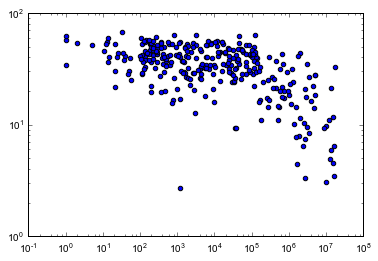

In [69]:
plt.scatter(flowSources['Accumulation Area (m^2)_ACRR'],flowSources['Slope (%)_ACRR'])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.hist(flowSources['Flow_acc ACRR'], 
            bins = np.logspace(3,8, 50))
plt.gca().set_xscale("log")

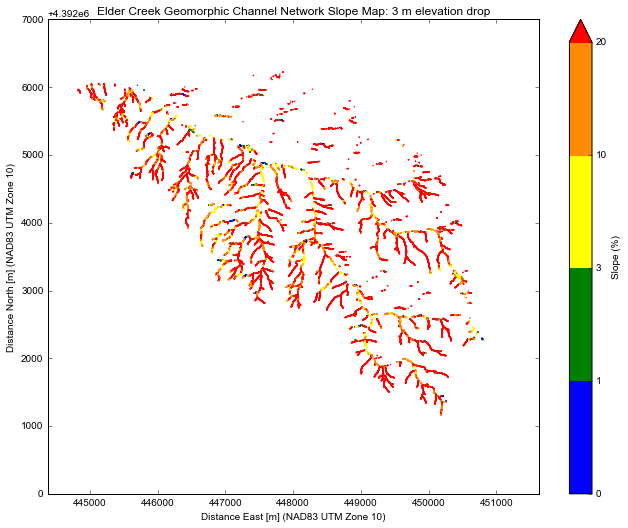

In [70]:
#Elder Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])


#Slope boundaries 
bounds = [0,1,3,10,20,100]

#cmap = cm.jet
cmap = colors.ListedColormap(['blue', 'green','yellow','darkorange','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsElder,YsElder,
            c = slopesElder, cmap = cmap,norm=norm,
            alpha=1, s=2, linewidth=0, zorder=areasElder)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Elder Creek Geomorphic Channel Network Slope Map: 3 m elevation drop')
# plt.savefig('Figs\\SkyThesis\ElderSlopeMap3mDiscrete_Dec12StreamLink_sortFID.pdf')

In [74]:
#Dry Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100]

#cmap = cm.jet
cmap = colors.ListedColormap(['blue', 'green','gold','darkorange','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsDry,YsDry,
            c = slopesDry, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Dry Creek Geomorphic Channel Network Slope Map: 3 m elevation drop')
plt.savefig('Figs\SkyThesis\DrySlopeMap3mDiscrete_Dec8-Aug8.pdf')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function post_execute at 0x0000000009888748> (for post_execute):


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

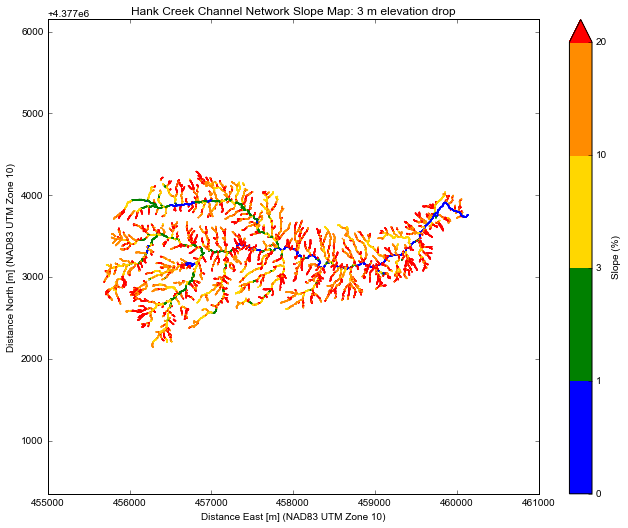

In [19]:
#Hank Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100]

#cmap = cm.jet
cmap = colors.ListedColormap(['blue', 'green','gold','darkorange','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsHank,YsHank,
            c = slopesHank, cmap = cmap,norm=norm,
            alpha=1, s=2, linewidth=0, zorder=areasHank)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Hank Creek Channel Network Slope Map: 3 m elevation drop')
plt.savefig('Figs\\SkyThesis\HankSlopeMap3mDiscrete_Dec8.pdf')

In [44]:
#Fox Creek Slope Map DISCRETE COLORBAR

fig, ax = plt.subplots(figsize=[11,8.5])

#Slope boundaries 
bounds = [0,1,3,10,20,100]

#cmap = cm.jet
cmap = colors.ListedColormap(['blue', 'green','yellow','darkorange','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)

ax= plt.scatter(XsFox,YsFox,
            c = slopesFox, cmap = cmap,norm=norm,
            alpha=1, s=5, linewidth=0, zorder=areasFox)
#cb = plt.colorbar(ax, label='Slope')
cb =plt.colorbar(ax, label='Slope (%)',
                                cmap=cmap, norm=norm, 
                                ticks=bounds, boundaries=bounds, extend='max')

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Fox Creek Slope: 3 m drop')
plt.savefig('Figs\\SkyThesis\FoxSlopeMap3mDiscrete_Dec8.pdf')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function post_execute at 0x0000000009888748> (for post_execute):


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

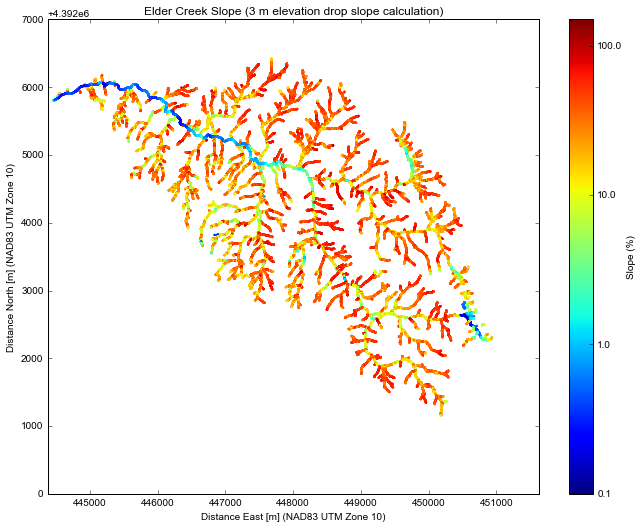

In [15]:
#Elder Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsElder,YsElder,
            c = slopesElder, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasElder)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Elder Creek Slope (3 m elevation drop slope calculation)')
plt.savefig('Figs\\SkyThesis\ElderSlopeMap3mContinuous_Dec12.pdf')

In [ ]:
#Dry Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsDry,YsDry,
            c = slopesDry, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Dry Creek Slope')
plt.savefig('Figs\\DrySlopeMap.pdf')

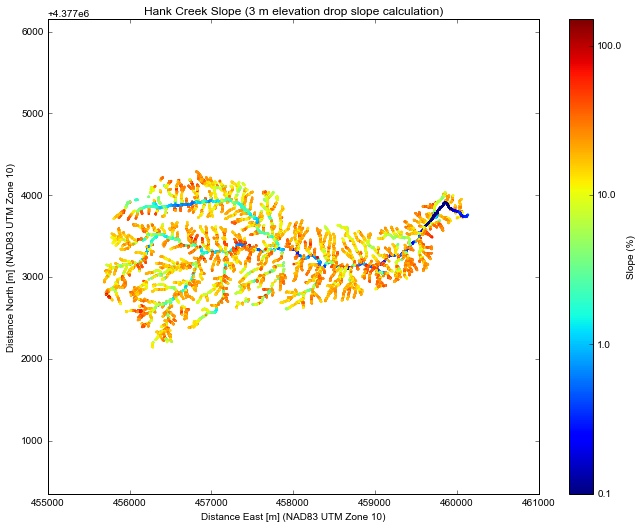

In [24]:
#Hank Creek Slope Map

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsHank,YsHank,
            c = slopesHank, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Hank Creek Geomorphic Channel Network Slope Map: 3 m elevation drop')
plt.savefig('Figs\\HankSlopeMap_Dec7.pdf')

In [ ]:
#FOX CREEK SLOPE MAP

fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsFox,YsFox,
            c = slopesFox, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasFox)
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())
plt.axis('equal')
plt.ylim([4398000, 4401000]) # 4398485.0 4400112
plt.xlim([445000, 449000]) # 445836.0 448219.0

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Fox Creek Slope Map')
plt.savefig('Figs\\FoxSlopeMap.pdf')